Fuente del ejemplo: 

https://dcain.etsin.upm.es/~carlos/bookAA/02.3MetodosdeClasificacion-Ratioseindicadores.html

Usaremos un dataset de ejemplo de la librería scikit-learn. 

En este caso, el ejemplo trata sobre la información de los iris de varios usuarios. Para nuestro proyecto, sería necesario saber la estructura de la tabla y de las columnas que hay en la base de datos de SIVARIA para realizar este proceso.

Cuenta con 5 columnas, de las cuáles las 4 primeras son las características, y la última será la clasificación objetivo, es decir, que será la columna que se usará para hacer la clasificación. La última columna va a tener valores 0, 1 o 2. 

Extraemos toda la información del dataset y lo guardamos en un dataframe de la librería *Pandas*. El contenido del dataframe es el siguiente:

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


De este dataframe, se dividirán los datos de entrenamiento y de prueba. 

En este caso, un 75% de los datos serán de entrenamiento y el 25% restante serán de test. 

*X* representa las características del conjunto de datos

*y* representa las etiquetas del conjunto de datos.

random_state=1 para proporcionar una semilla para la generación de números aleatorios. De esta manera, la división no es la misma cada vez que se ejecute la función, lo que asegura que la división sea reproducible.



In [4]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,0:4], df.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

Se hace el ajuste de los datos de entrenamiento usando el clasificador Näive-Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

Creamos la matriz de confusión. En este caso, los posibles resultados podían ser 0, 1 y 2 (columna *target*) --> setosa, versicolor, virginica (columna *target_names*). Por lo tanto, la matriz de resultado no sería una matriz 2x2 convencional, sino una 3x3.

C:\Users\aldai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


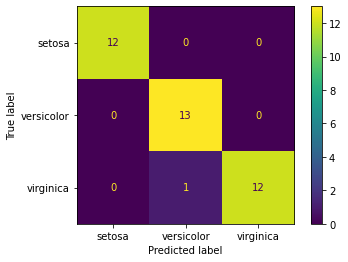

In [6]:
from sklearn.metrics import plot_confusion_matrix
classNames = iris['target_names']
plot_confusion_matrix(clf_NB, X_test, y_test, display_labels=classNames)  

Calculamos la puntuación de la clasificación para saber si ha tenido un nivel de precisión alto o no. Para ello, predecimos primero los valores de y (*y_pred*), porque antes todavía no se habían predicho.

In [7]:
y_pred = clf_NB.predict(X_test)
print(y_pred)
print(y_test)

[2. 0. 0. 0. 1. 0. 1. 1. 0. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1.
 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 0. 1. 2. 2.]
[2. 0. 0. 0. 1. 0. 1. 2. 0. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1.
 0. 0. 0. 1. 2. 0. 0. 2. 1. 0. 0. 1. 2. 2.]


Ahora si podemos calcular el nivel de acierto de la clasificación. Para ello, se usan varios ratios.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('Sensibilidad - Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='micro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Exactitud - Accuracy: 0.974
Precision: 0.974
Sensibilidad - Recall: 0.974
F1: 0.974


Como todos los indicadores tienen el mismo valor, entonces podemos escoger cualquiera. En este caso, escogemos el indicador de Exactitud - Accuracy.

In [11]:
from sklearn.metrics import accuracy_score
print('Exactitud - Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Exactitud - Accuracy: 0.974


También podemos evaluar el nivel de nuestro clasificador, para saber si le clasificador que hemos escogido es el adecuado o no, o por lo tanto, probar otros tipos de clasificadores que nos den mejores resultados. Esto lo haremos mediante el cálculo del p-valor, es decir, la fracción de los datos aleatorios donde el rendimiento del clasificador es mejor que el original. Para calcularlo, se usará la técnica de **Bootstraping**, es decir, realizar una serie de muestras donde, en cada una, se crea un conjunto de datos aleatorio nuevo con respecto al original.


Primero calculamos la precisión inicial.

In [14]:
## Entrenamiento inicial y toma del ACC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred=clf_NB.predict(X_test)
ACC_Ini = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Exactitud - Accuracy Inicial: %.3f' % ACC_Ini)

Exactitud - Accuracy Inicial: 0.974


Luego calculamos la precisión en cada muestra, en este caso, 100 muestras, y se compara con el original. Si la precisión de la muestra es mayor que la original, se incrementa su contador (*Cont*).

Para que el cálculo sea válido, es necesario que en cada muestra, el subconjunto de entrenamiento debe ser diferente en cada una. Para ello, se generan índices aleatorios en cada muestra para generar subconjuntos diferentes. Los índices se pueden repetir. 

En este caso, el p-valor es muy pequeño, por lo tanto, podemos concluir que la precisión inicial es mejor que la gran mayoría de las precisiones calculadas en las muestras. Por lo tanto, nuestro clasificador no ha dado predicciones correctas por pura suerte, anulando así la hipótesis nula. 

In [22]:
import numpy as np
## Hacemos el entrenamiento de los clasificadores
NumRepeticiones = 100 # hacemos 100 muestras con bootstrap
NumMuestras = X_train.shape[0] # el número de muestras totales en X_train
indices = np.arange(X_train.shape[0]) # un listado con los índices de X_train 1,2,...,NumMuestras
clf_Boot = GaussianNB()
Cont = 0

i=0

for rep in np.arange(NumRepeticiones):
    indicesNew = np.random.choice(indices,NumMuestras,replace=True) #nuevos indices cogidos al azar
    X_train_Boot = X_train[indicesNew] # tomamos los datos X de esos indices
    y_train_Boot = y_train[indicesNew] # y sus categorías
    '''
    Usado para mostrar los indices y conjuntos X e y escogidos en las 2 primeras muestras 
    if i<2: 
        print(indicesNew)
        print(X_train_Boot)
        print(y_train_Boot)
    '''
    clf_Boot.fit(X_train_Boot, y_train_Boot)
    
    i+=1
    
    if clf_Boot.score(X_test, y_test) > ACC_Ini:
        Cont +=1

p_valor = (Cont+1)/(NumRepeticiones + 1)
p_valor, Cont

(0.009900990099009901, 0)